In [1]:
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance

In [2]:
file_path = r'C:\Users\dell\Desktop\MyDocs\Docs\MK\Tesla Stock Dataset.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2010-06-29,1.592667,1.592667,1.666667,1.169333,1.266667,281494500
1,2010-06-30,1.588667,1.588667,2.028000,1.553333,1.719333,257806500
2,2010-07-01,1.464000,1.464000,1.728000,1.351333,1.666667,123282000
3,2010-07-02,1.280000,1.280000,1.540000,1.247333,1.533333,77097000
4,2010-07-06,1.074000,1.074000,1.333333,1.055333,1.333333,103003500


In [3]:
# Check for missing values
df.isnull().sum()

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Display the data types to confirm changes
df.dtypes

Adj Close    float64
Close        float64
High         float64
Low          float64
Open         float64
Volume         int64
dtype: object

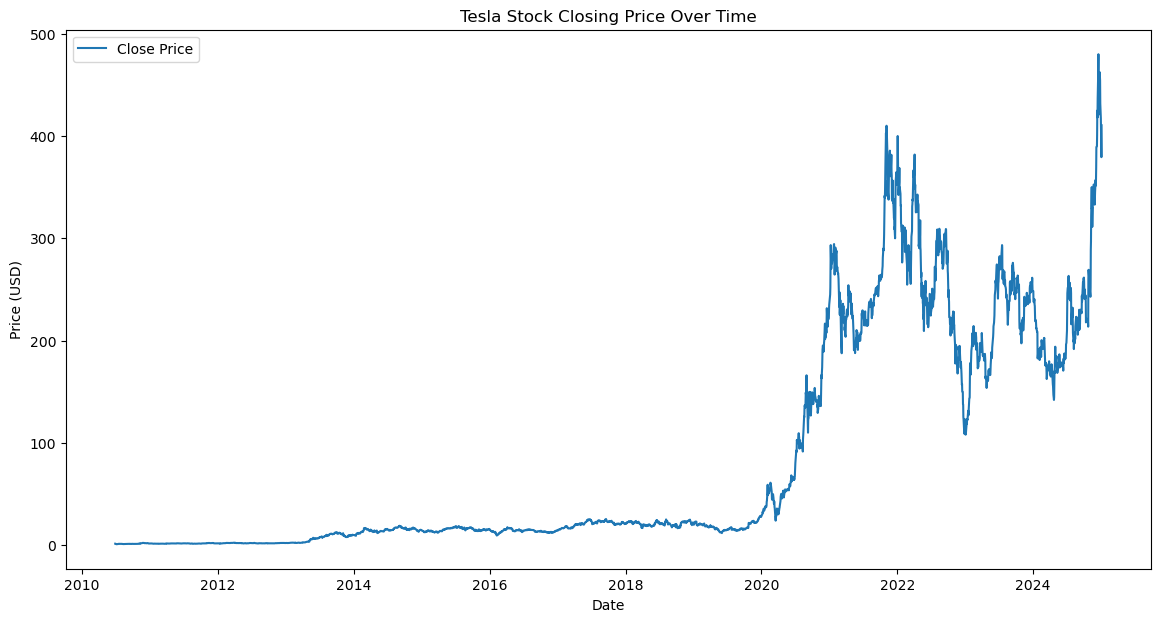

In [4]:
# Plot the closing price over time
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price')
plt.title('Tesla Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

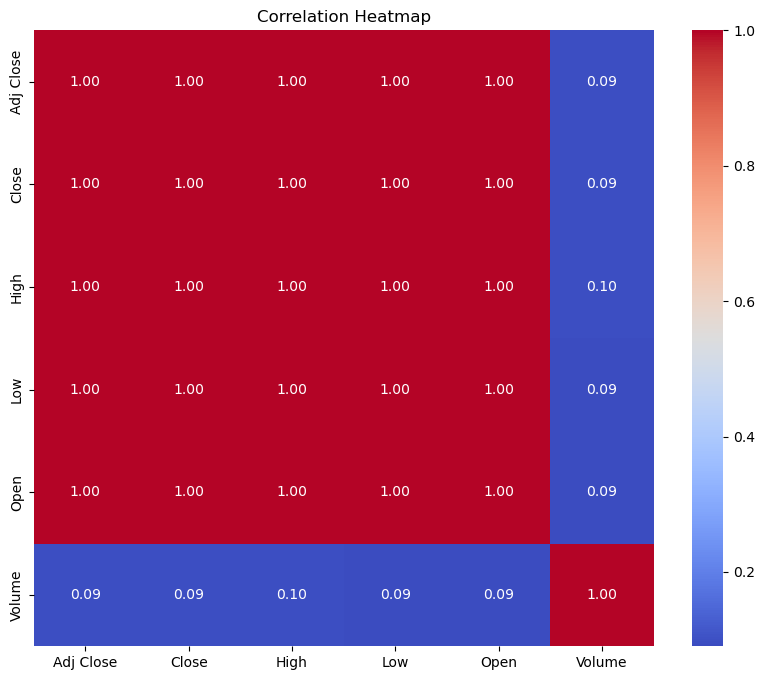

In [5]:
# Correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [6]:
df['7_day_MA'] = df['Close'].rolling(window=7).mean()

# Display the first few rows to confirm the new feature
df.head()

,Adj Close,Close,High,Low,Open,Volume,7_day_MA
Date,,,,,,,
2010-06-29,1.592667,1.592667,1.666667,1.169333,1.266667,281494500,NaN
2010-06-30,1.588667,1.588667,2.028000,1.553333,1.719333,257806500,NaN
2010-07-01,1.464000,1.464000,1.728000,1.351333,1.666667,123282000,NaN
2010-07-02,1.280000,1.280000,1.540000,1.247333,1.533333,77097000,NaN
2010-07-06,1.074000,1.074000,1.333333,1.055333,1.333333,103003500,NaN


In [7]:
# Prepare the data for modeling
features = ['Open', 'High', 'Low', 'Volume', '7_day_MA']
X = df[features].dropna()
y = df['Close'].loc[X.index]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2

(7.533761822476917, 0.9993710905543872)

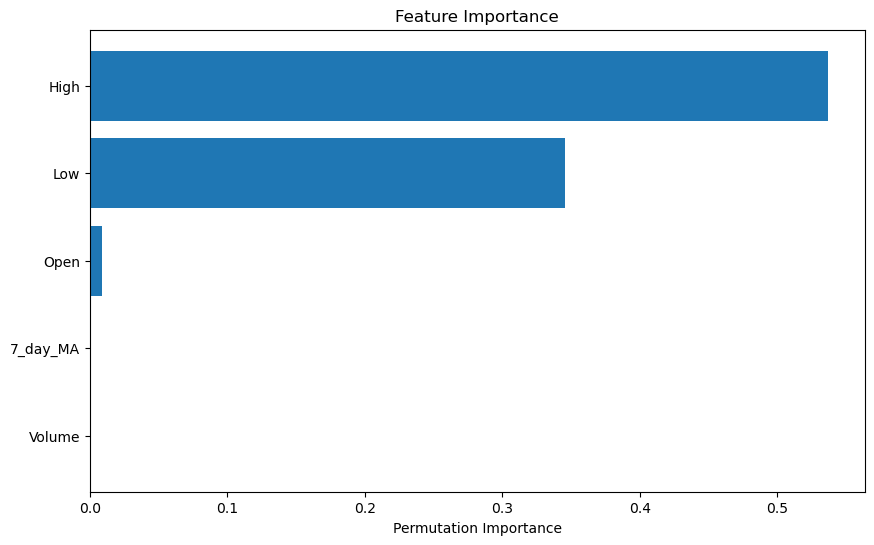

In [8]:
# Plot feature importance
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Feature Importance')
plt.show()